In [1]:
#데이터 중 출근시간대 데이터만 처리합니다.
import pandas as pd
import matplotlib.pyplot as plt

bus=pd.read_csv("Seoul_bus_statistics_Mar_2025.csv",encoding="cp949")
metro=pd.read_csv("Seoul_metro_statistics_Mar_2025.csv",encoding="cp949")

bus= bus.iloc[:,[1,2,5]+list(range(18,26))] #데이터 슬라이싱은 "pd.DataFrame(bus.columns)"로 참고했습니다.
metro= metro.iloc[:,[1,2]+list(range(7,15))] #데이터 슬라이싱은 "pd.DataFrame(metro.columns)"로 참고했습니다.

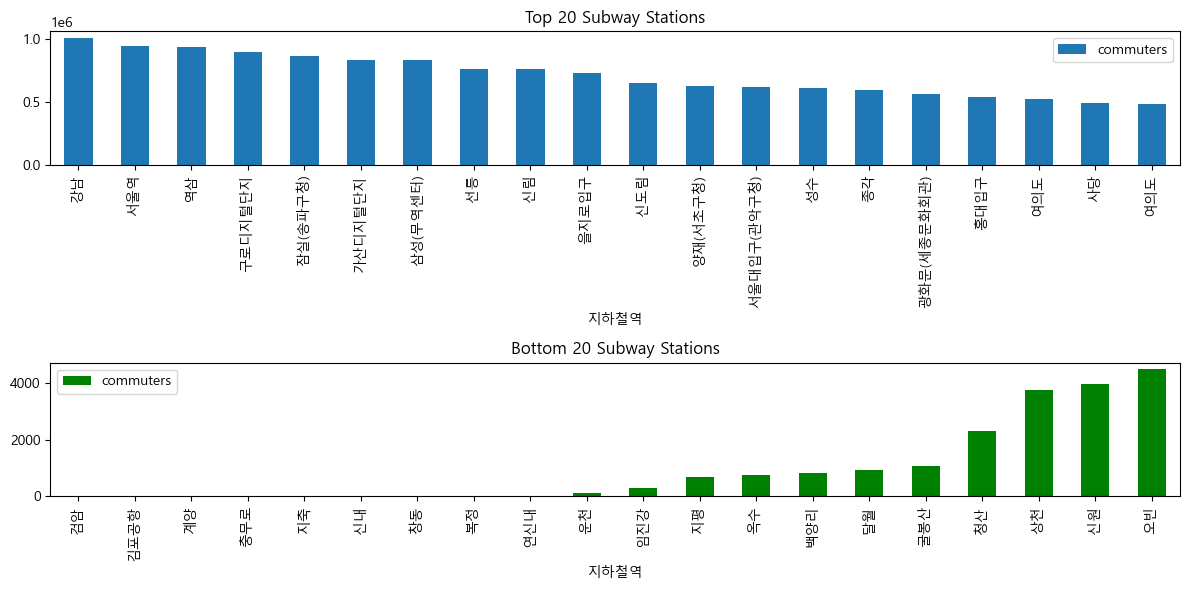

In [2]:
#교통량이 많은 지하철역과 적은 지하철역 20개를 추출해 바차트로 표시합니다.

metro['commuters']=metro.iloc[:,3:10].sum(axis=1)

metro=metro.sort_values(by='commuters',ascending=False)

metro_head=metro.head(20)
metro_tail=metro.tail(20)
metro_tail=metro_tail.sort_values(by='commuters',ascending=True)

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


plt.rc('font',family="Malgun Gothic")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

metro_head.plot(x='지하철역', y='commuters', kind='bar', ax=ax1)
metro_tail.plot(x='지하철역', y='commuters', kind='bar', ax=ax2,color='green')

ax1.set_title("Top 20 Subway Stations")
ax2.set_title("Bottom 20 Subway Stations")

plt.tight_layout()
plt.show()


### 출근시간대 이용객 수가 많은 역과 적은 역의 차이가 얼마나 크게 나는 지 시각적으로 표시하기 위한 bar plot입니다.

* 상위 20개 역은 비교적 균일하게 이용객 수가 많은 편입니다. 하위 20개 역은 이용객 차이가 역별로 크게 나는 모습을 확인할 수 있습니다.

* 이는 출근 시간대 직장인들의 주요 목적지가 비교적 소수 자치구에 몰려있음을 나타냅니다. 다만, 하위 20개 역은 사람들이 많이 이용함에도 승하차 집표 수가 매우 적은 역들이 있어 해석에 주의를 요합니다.

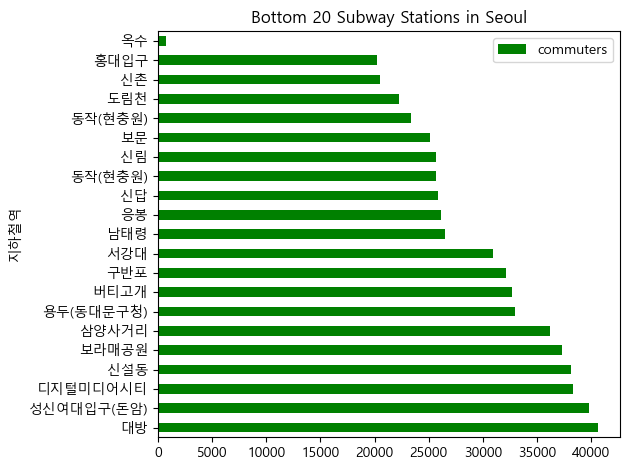

In [3]:
#이용객 하위 역에 경기도 소속 역들이 많으므로 좀 더 탐색해 서울시내 하위 20개 역을 선정합니다.

metroS_tail=metro.tail(100)

# 그 중 서울시내에 속한 역들만 뽑아 다시 계산합니다.
# 김포공항, 충무로, 신내, 창동, 복정, 연신내역은 승하차역보다 환승 중심지로서 기능한다고 볼 수 있기에 이상치로 판단했습니다.
# 지축역 역시 서울 외곽의 역으로 연선 주민들이 많이 없기에 이상치로 판단해 제거했습니다.

selected_stations = [
    "대방", "성신여대입구(돈암)", "디지털미디어시티", "신설동",
    "보라매공원", "삼양사거리", "용두(동대문구청)", "버티고개",
    "구반포", "서강대", "남태령", "응봉", "신답",
    "동작(현충원)", "신림", "보문", "도림천",
    "신촌", "홍대입구", "옥수"]

metroS_filtered = metroS_tail[metroS_tail['지하철역'].isin(selected_stations)]

metroS_filtered.plot(x='지하철역', y='commuters', kind='barh',color='green')
plt.title("Bottom 20 Subway Stations in Seoul")
plt.tight_layout()

### 서울시내 출근시간대 이용객 수가 적은 역 간의 차이가 얼마나 크게 나는 지 시각적으로 표시하기 위한 수정된 barh plot입니다.

* 이용객 수가 적은 역들 중에서도 어느정도 이용객 수가 균질한 역들을 묶을 수 있습니다.또한 서울 도심이나 부도심에 위치함에도 이용객 수가 적은 역이 확인되었습니다.

* 이를 통해서 철도 교통 소외는 단순히 서울 외곽에서 발생하는 것이 아니라 서울의 핵심 지역에서도 충분히 발생한다는 것을 알 수 있습니다. 다만, 환승 중심지는 환승 이용객이 승하차객보다 훨씬 많음을 감안해야 합니다.

#### 김포공항, 충무로, 신내, 창동, 복정, 연신내역은 승하차역보다 환승 중심지로서 크게 기능한다고 볼 수 있기에 이상치로 판단해 제거했습니다.

#### 지축역, 신내역 역시 서울 외곽의 역으로 연선 주민들이 많이 없기에 이상치로 판단해 제거했습니다.

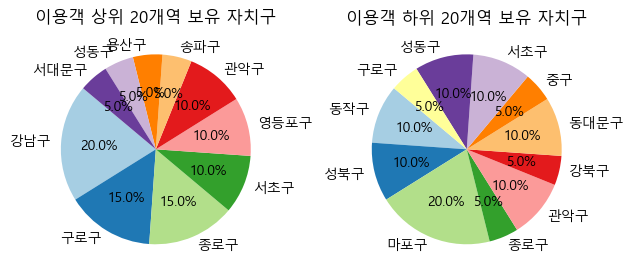

In [4]:
#자치구별 지하철 점유도를 pie chart로 표시합니다.

# 이용객 하위 역 중 서울과 인접하지 않은 경기도는 제외했습니다.

data_head = [
    ["강남구", 4],
    ["구로구", 3],
    ["종로구", 3],
    ["서초구", 2],
    ["영등포구", 2],
    ["관악구", 2],
    ["송파구", 1],
    ["용산구", 1],
    ["성동구", 1],
    ["서대문구", 1]]

columns1 = ["자치구", "지하철역 개수"]

MetroHeadDf = pd.DataFrame(data_head, columns=columns1)

import pandas as pd

data_tail =[
    ("동작구", 2),
    ("성북구", 2),
    ("마포구", 4),
    ("종로구", 1),
    ("관악구", 2),
    ("강북구", 1),
    ("동대문구", 2),
    ("중구", 1),
    ("서초구", 2),
    ("성동구", 2),
    ("구로구", 1)]

columns2 = ["자치구", "지하철역 개수"]

MetroTailDf = pd.DataFrame(data_tail, columns=columns2)


plt.subplot(121)
plt.pie(MetroHeadDf["지하철역 개수"], labels= MetroHeadDf["자치구"], autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
plt.title("이용객 상위 20개역 보유 자치구")
plt.tight_layout()

plt.subplot(122)
plt.pie(MetroTailDf["지하철역 개수"], labels= MetroTailDf["자치구"], autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
plt.title("이용객 하위 20개역 보유 자치구")
plt.tight_layout()
plt.show()


### 위에 조사한 역들을 자치구별로 묶어서 거시적으로 어떤 자치구가 철도교통 소외지역인지 확인하기 위한 pie chart입니다.

* 상위 20개 역 분포는 주로 강남구, 구로구, 종로구 등 서울의 업무지구에 몰려있습니다. 하위 20개 역 자치구 분포는 주로 주거지역인 마포구에 많이 몰려있고, 나머지는 성북구, 동작구, 성동구 등 주거지역에 몰려있습니다.


* 이는 출근 시간대 직장인들의 주요 목적지가 비교적 소수 자치구에 몰려있음을 나타냅니다. 반면, 하위 20개 역은 그들 사이에서도 큰 차이가 보이는 것으로 보아 철도교통 소외가 지역별로도 크게 나타납니다.

In [5]:
#출근시간대 승하차인원이 많은 정류장들 30곳을 추출합니다.

bus['commuters']=bus.iloc[:,3:10].sum(axis=1)

bus=bus.sort_values(by='commuters',ascending=False)

bus_head=bus.head(30)

bus_head



,노선번호,노선명,역명,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,8시승차총승객수,8시하차총승객수,9시승차총승객수,9시하차총승객수,commuters
23685,동대문01,동대문01(회기역~경희의료원),회기역(00001),3894,615,10354,1976,20030,2990,12600,2291,52459
23100,금천03,금천03(가산디지털단지역~구로디지털단지역),구로디지털단지역(중)(00016),1138,4392,2589,11126,4463,13941,2360,8964,40009
22430,관악10,관악10(아카시아마을.민방위교육장~신림역),신림역4번출구(00015),970,3906,2332,10114,2626,11558,1740,7731,33246
26035,양천01,양천01(등촌역~당산역),당산역.지하철2호선(00019),957,3216,3065,6831,5703,8275,3296,6650,31343
25754,성북08,성북08(신안아파트.길음초등학교~길음역),길음전철역(00008),327,5270,774,10558,1066,11127,357,6303,29479
23097,금천03,금천03(가산디지털단지역~구로디지털단지역),가산디지털단지역(00001),1852,12,6815,166,12829,262,6771,69,28707
23687,동대문01,동대문01(회기역~경희의료원),경희대의료원(00004),213,2657,1292,5463,1665,14071,2865,10085,28226
10562,5621,5621번(삼익아파트~구로공단역),구로디지털단지역(중)(00010),797,4369,1475,8222,2783,8226,1489,6056,27361
22542,관악06,관악06(신림3동보명사~신대방역),신대방역(00013),1074,4056,1566,7326,1883,9616,1539,6103,27060
22450,관악02,관악02(낙성대역~서울대신공학관),낙성대역(00039),831,815,2302,2023,8724,2946,8105,3175,25746


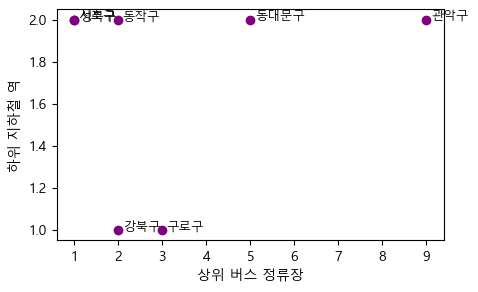

In [6]:
#자치구별로 정류장 통계를 묶어 scatterplot으로 자치구별 지하철 소외의 정도와 정류장 이용도를 분석합니다.

bus_region=[('관악구', 9),
    ('동대문구', 5),
    ('구로구', 3),
    ('금천구', 2),
    ('동작구', 2),
    ('강북구', 2),
    ('영등포구', 1),
    ('성북구', 1),
    ('서대문구', 1),
    ('과천시', 1),
    ('서초구', 1),
    ('중랑구', 1),
    ('노원구', 1)]

# 데이터프레임을 합쳐서 자치구별 최저 이용 역과 최다이용 정류장 간 관계를 나타냅니다.
df_bus = pd.DataFrame(bus_region, columns=['자치구', '상위 버스 정류장 보유수'])
df_metro = pd.DataFrame(data_tail, columns=['자치구', '하위 지하철 역 보유수'])

df_merge = pd.merge(df_bus, df_metro, on='자치구', how='inner')

plt.figure(figsize=(5,3))
plt.scatter(df_merge['상위 버스 정류장 보유수'], df_merge['하위 지하철 역 보유수'], color='purple')
plt.xlabel('상위 버스 정류장')
plt.ylabel('하위 지하철 역')

# 자치구명 라벨 표시
for i, row in df_merge.iterrows():
    plt.text(row['상위 버스 정류장 보유수'] + 0.1, row['하위 지하철 역 보유수'], row['자치구'], fontsize=9)


### 소수 이용객 수를 가진 지하철 역과, 다수 이용객 수를 가진 버스 정류장의 관계를 자치구별로 확인하기 위한 scatter plot입니다.

* 분석 결과 관악구가 다수 이용객 버스정류장과 소수 이용객 지하철역을 모두 많이 가지고 있음이 확인되었습니다. 이외에도 동대문구, 동작구가 비슷한 모습을 보이고 있음이 확인되었습니다. 강북구와 구로구는 지하철 역 불편은 적은 대신 버스 정류장 한 곳에 이용객이 몰리는 현상은 관찰됩니다. 서초구, 성북구는 이용객 하위 지하철 역만 많은 것으로 관찰되었습니다


* 이를 통해 관악구, 동대문구 그룹을 철도 교통이 비효율적인데 대체재가 마땅하지 않은 지역으로 판단할 수 있습니다. 
* 강북구, 구로구 그룹은 철도교통의 비효율성은 비교적 적지만, 버스교통 의존도가 높은 것으로 판단이 가능합니다. 따라서 버스 노선을 대체할 철도교통이 필요합니다. 
* 서초구, 성북구, 동작구 그룹은 버스 의존도가 낮아 철도교통이 비교적 잘 되어 있는 지역으로 생각할 수 있습니다. 이 그룹의 철도 이용객 수가 적은 역이 있는 것은 버스와 지하철이 대체제 성격을 갖는 이상, 인근 역들이 수요를 가져가기 때문으로 예측할 수 있습니다. 오히려 기존 철도역 이용 확충이 필요합니다.


* 이 그래프에는 나타나지 않았지만, 철도 이용이 적은 역들을 많이 가진 자치구는 동일하게 기존 철도역 이용 확충을 유도해야 합니다. 
* 철도 이용이 적은 역은 없지만 이용객이 많은 버스 정류장을 가진 자치구는 단순히 교통량이 많은 것으로 판단합니다.

In [7]:
# 데이터가 한 곳에 몰려 있으므로 그 한 점에 몇 데이터가 있는지 확인합니다.

df_merge

,자치구,상위 버스 정류장 보유수,하위 지하철 역 보유수
0,관악구,9,2
1,동대문구,5,2
2,구로구,3,1
3,동작구,2,2
4,강북구,2,1
5,성북구,1,2
6,서초구,1,2


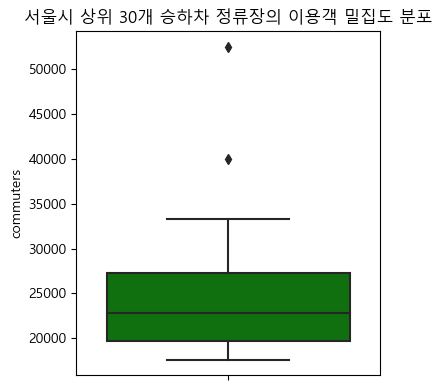

In [8]:
# 버스 승차인원 상위 30개 정류장의 boxplot으로 얼마나 많은 사람들이 상위 정류장에 몰리는 지 확인합니다.
import seaborn as sns

plt.figure(figsize=(4,4))
sns.boxplot(y='commuters', data=bus_head,color='g')
plt.title('서울시 상위 30개 승하차 정류장의 이용객 밀집도 분포')
plt.tight_layout()
plt.show()


### 버스 이용객이 많은 정류장 상위 30개의 분포를 분석하기 위한 box plot입니다.

* 조사 결과 2개의 이상치가 발견되었습니다. q1에서 q3까지의 분포가 비교적 작고, 분산이 크게 나타납니다.


* 이상치 2개는 특히 주목해 어떻게 하면 수요를 철도 교통으로 분산할 지에 대한 분석이 시급합니다.
* IQR의 분포가 비교적 큰 것으로 보아, 각 구간별로 중앙값을 뽑아 대표적인 정류장을 중심으로 교통 대책을 세울 수 있습니다. q1, q2, q3에 속하는 정류장의 특징을 추출하는 것이 가능합니다.

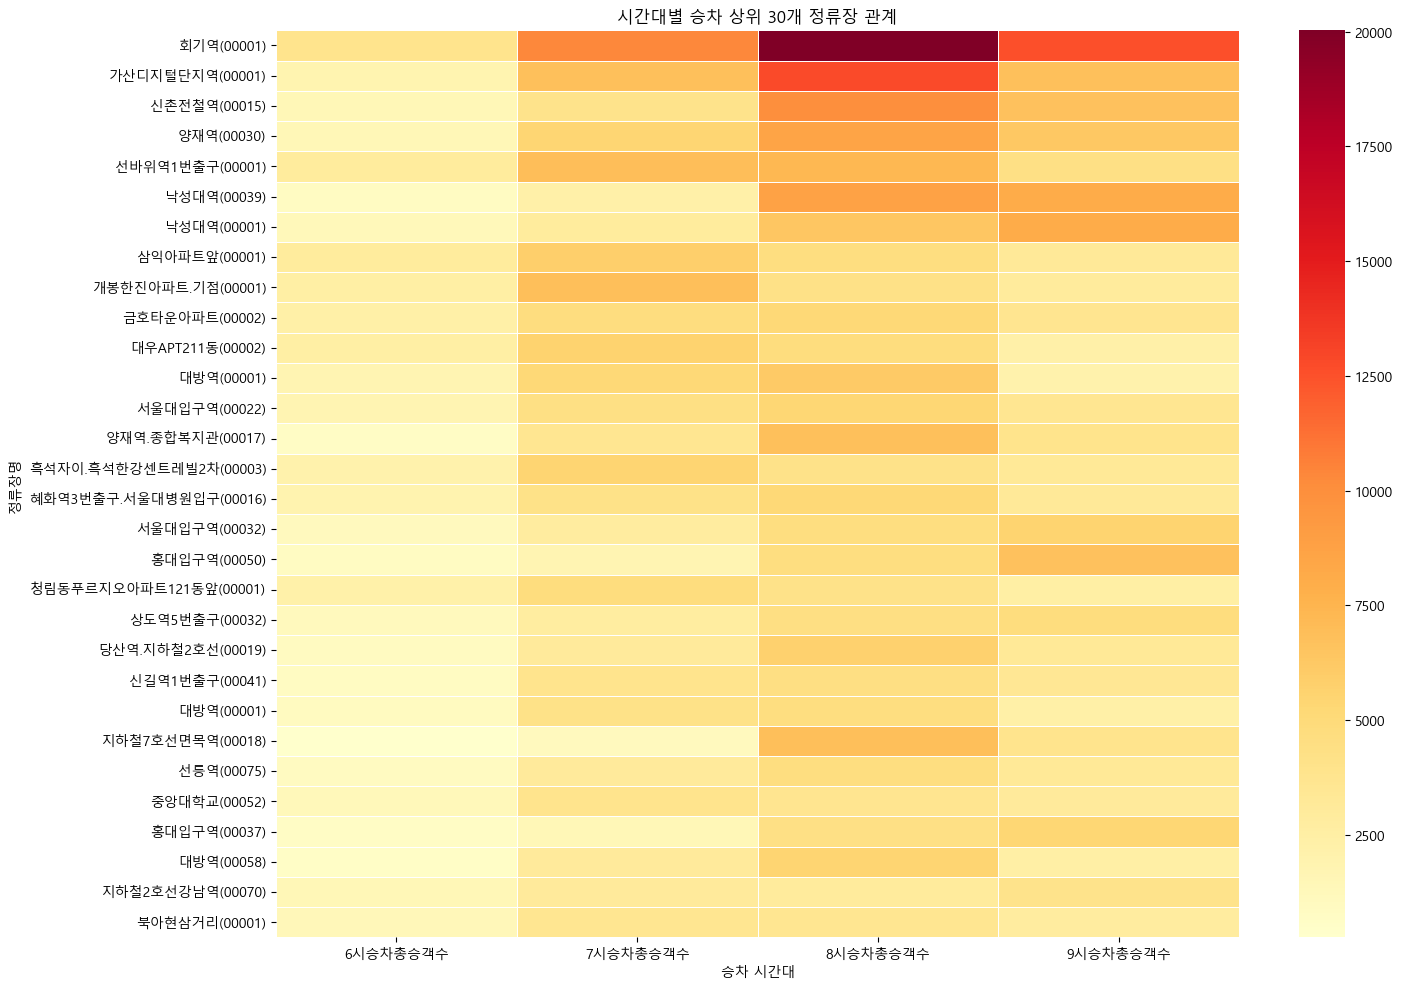

In [9]:
# 승차인원 상위 30개 정류장과 하위 30개 정류장 간 관계를 heatmap으로 분석합니다.

#승차객 데이터를 모두 합해 하차객이 많은 정류장 순으로 정렬합니다.
bus['board']=bus.iloc[:,[3,5,7,9]].sum(axis=1)
bus['stop']=bus.iloc[:,[4,6,8,10]].sum(axis=1)

bus_board=bus=bus.sort_values(by='board',ascending=False)
bus_board=bus_board.head(30)
bus_board=bus_board.iloc[:,[2,3,5,7,9]]

bus_board = bus_board.set_index('역명')

# 히트맵 시각화
plt.figure(figsize=(15, 10))
sns.heatmap(bus_board, cmap="YlOrRd", linewidths=0.5, annot=False)
plt.title("시간대별 승차 상위 30개 정류장 관계")
plt.xlabel("승차 시간대")
plt.ylabel("정류장명")
plt.tight_layout()
plt.show()

### 시간대별로 어느 정류장에서 사람들이 많이 승차하는 지를 표시한 heatmap 입니다.

* 회기역과 가산디지털단지역 정류장에서 눈에 띄게 많은 사람들이 7시부터 9시까지 탑승함을 확인할 수 있습니다. 그 이외 정류장들은 모두 균일하지만, 신촌전철역, 양재역, 낙성대역, 선바위역 1번출구 등 역 근처 정류장 탑승객이 상위권에 있음을 확인할 수 있습니다.
* 지하철역 정류장을 제외하고는 아파트 등 주거지 지역의 정류장이 다수를 차지하는 것을 확인할 수 있습니다.


* 주거지역에 위치한 정류장들을 중심으로 출근시간대 인원 이동을 예측하는 것이 유용합니다. 7,8시에 탑승한 인원과 8,9시에 하차한 인원을 비교해봅니다. 또한, 이들의 소속 자치구와 비교할 수도 있습니다.
* 지하철역에서 승차한 수요는 지하철에서 내려 버스로 세부 목적지까지 가는 경우로 짐작이 가능하므로, 이 경우는 출근시간대 사람들의 목적지 예측 정도로 쓸 수 있습니다. 이용객 상위 지하철역에서 할 수 없는 이용객의 근무지 예측을 자치구 단위로 해볼 수 있습니다. 회기역, 가산디지털단지역, 신촌전철역, 양재역, 낙성대역, 선바위역은 따로 인구통계학적 분포를 확인해 질적으로 분석해야 합니다.

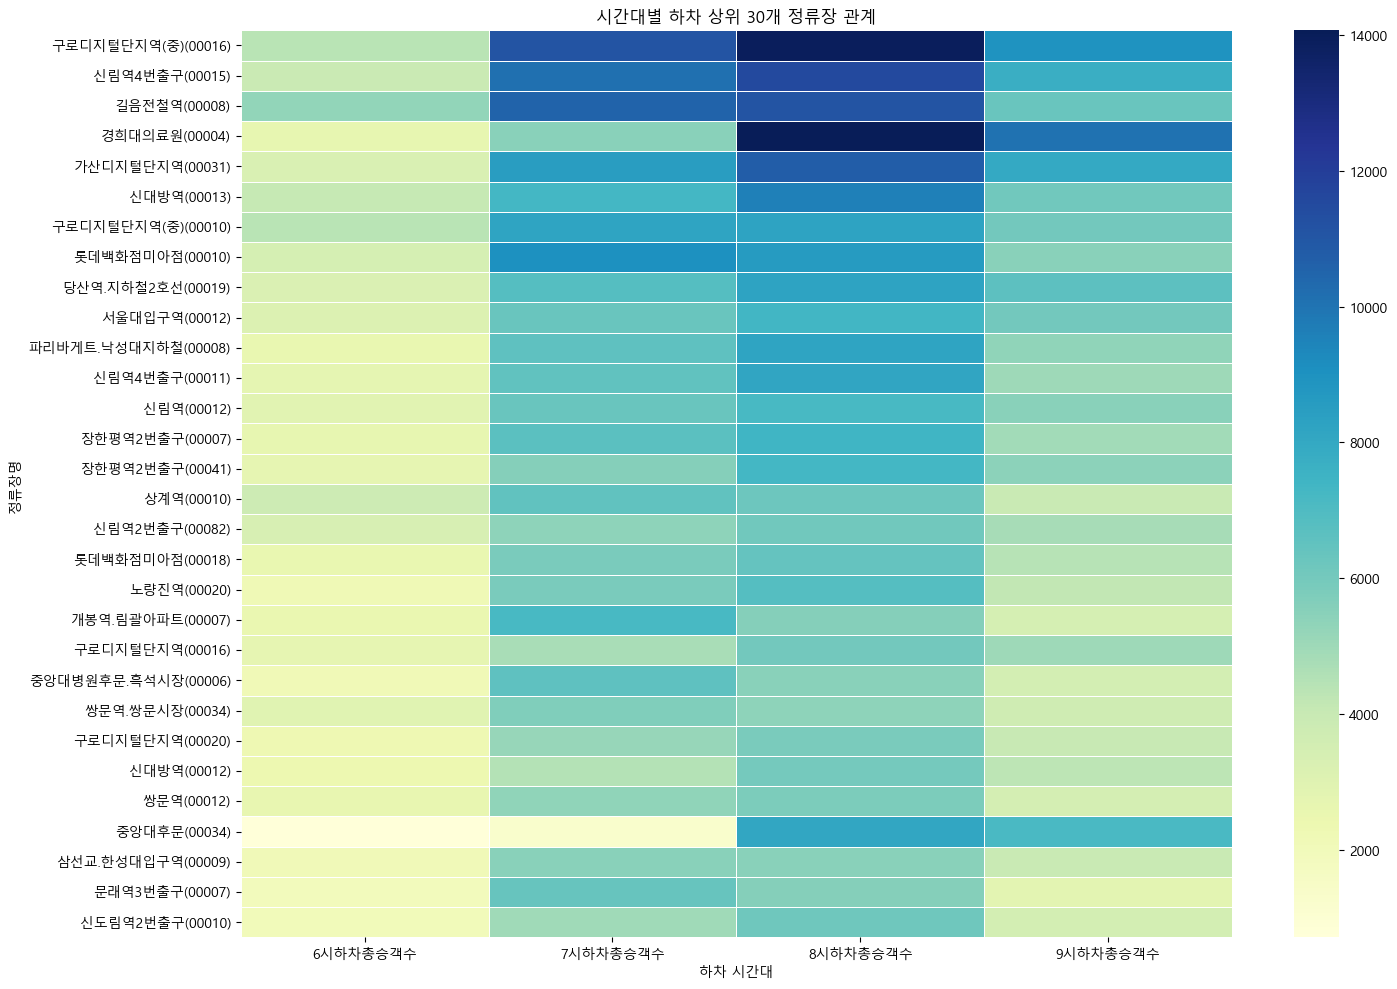

In [10]:
#하차객 데이터를 모두 합해 하차객이 많은 정류장 순으로 정렬합니다.
bus_alight=bus.sort_values(by='stop',ascending=False)
bus_alight=bus_alight.head(30)
bus_alight=bus_alight.iloc[:,[2,4,6,8,10]]

bus_alight = bus_alight.set_index('역명')

plt.figure(figsize=(15, 10))
sns.heatmap(bus_alight, cmap="YlGnBu", linewidths=0.5, annot=False)
plt.title("시간대별 하차 상위 30개 정류장 관계")
plt.xlabel("하차 시간대")
plt.ylabel("정류장명")
plt.tight_layout()

plt.show()

### 시간대별로 어느 정류장에서 사람들이 많이 하차하는 지를 표시한 heatmap 입니다.

* 역시 구로디지털단지역, 신림역, 길음전철역, 가산디지털단지역 등 지하철역 근처 버스 정류장의 하차량이 많은 것을 확인할 수 있습니다.
* 지하철역 정류장이 아닌 경우에는 경희대 의료원 하차량이 많은 것을 확인할 수 있습니다. 특히 9시에는 하차량이 제일 많은 것으로 보아 많은 사람들이 목적지로 정하는 것을 확인할 수 있습니다. 이와 비슷한 케이스로 중앙대 후문 정류장을 들 수 있습니다. 


* 출근시간대 사람들이 주간선으로 지하철을 이용한다는 것을 감안하면, 많은 철도교통 소외지역 사람들이 구로디지털단지역, 신림역, 길음역, 가산디지털단지역을 활용한다는 사실을 알 수 있습니다. 
* 경희대 의료원, 중앙대 후문 정류장 등 9시 하차객 수가 많고 지하철역 근처가 아닌 정류장들은 그 자체를 목적지로 삼는 경우가 많다는 것을 확인할 수 있습니다. 이들을 중심으로 이용객들의 목적지를 추정해볼 수 있습니다.